In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
import xgboost as XGB
from matplotlib.font_manager import FontProperties

In [2]:
#訓練集
attribute = ['age','workclass','fnlwgt','education','education-num','marital-status',
             'occupation','relationship','race','sex','capital-gain','capital-loss',
             'hours-per-week','native-country','income']
df = pd.read_table('adult.train.txt',sep=', ',names=attribute,na_values = '?')
df.reset_index(inplace=True, drop=True)
df.dropna(axis=0, how='any', inplace=True)
df = df.drop(columns=['fnlwgt','education-num','relationship','capital-gain','capital-loss'])
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_14912\532766365.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table('adult.train.txt',sep=', ',names=attribute,na_values = '?')


       age         workclass   education      marital-status  \
0       39         State-gov   Bachelors       Never-married   
1       50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2       38           Private     HS-grad            Divorced   
3       53           Private        11th  Married-civ-spouse   
4       28           Private   Bachelors  Married-civ-spouse   
...    ...               ...         ...                 ...   
32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557   40           Private     HS-grad  Married-civ-spouse   
32558   58           Private     HS-grad             Widowed   
32559   22           Private     HS-grad       Never-married   
32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   race     sex  hours-per-week native-country income  
0           Adm-clerical  White    Male              40  United-States  <=50K  
1        Exec-managerial  White    Male              13  United-States 

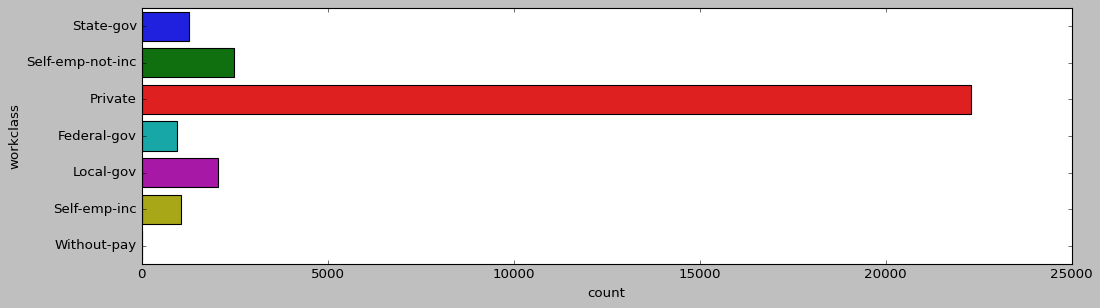

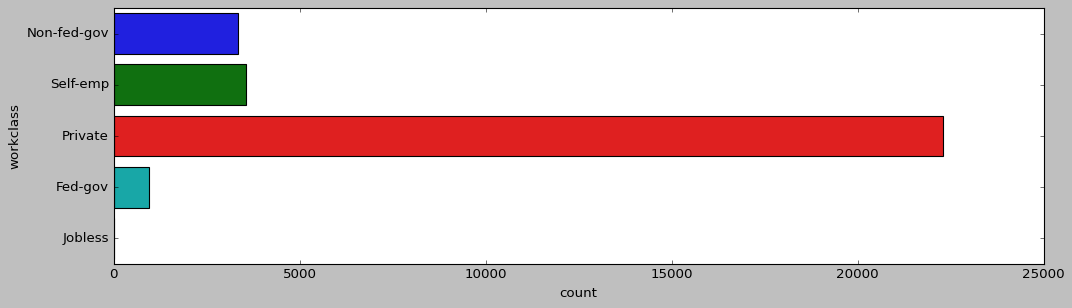

In [3]:
plt.style.use('classic')  
plt.figure(figsize=(15, 4))   
sns.countplot(y="workclass", data=df)
plt.show()

df.loc[df['workclass'] == 'Without-pay', 'workclass'] = 'Jobless'       #沒工作
df.loc[df['workclass'] == 'Never-worked', 'workclass'] = 'Jobless'      #沒工作
df.loc[df['workclass'] == 'Federal-gov', 'workclass'] = 'Fed-gov'       #聯邦政府
df.loc[df['workclass'] == 'State-gov', 'workclass'] = 'Non-fed-gov'     #非聯邦政府
df.loc[df['workclass'] == 'Local-gov', 'workclass'] = 'Non-fed-gov'     #非聯邦政府
df.loc[df['workclass'] == 'Self-emp-not-inc', 'workclass'] = 'Self-emp' #自由職業
df.loc[df['workclass'] == 'Self-emp-inc', 'workclass'] = 'Self-emp'     #自由職業

plt.style.use('classic')  
fig = plt.figure(figsize=(15, 4))   
sns.countplot(y="workclass", data=df)
plt.show()

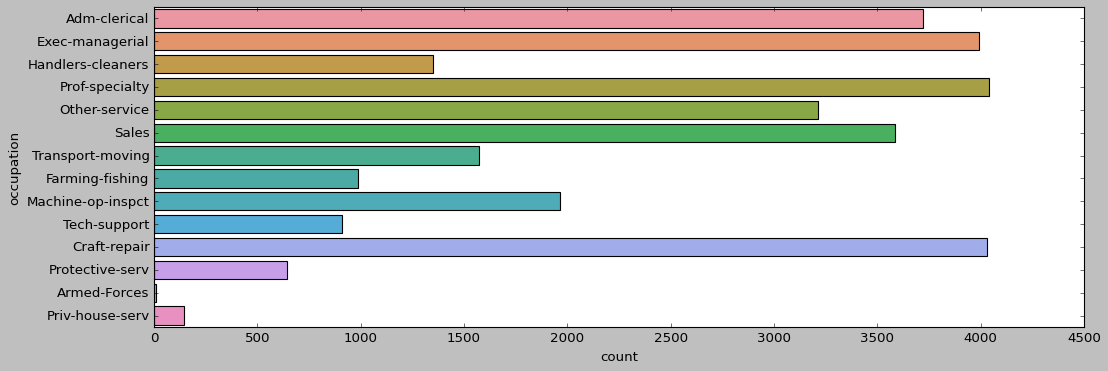

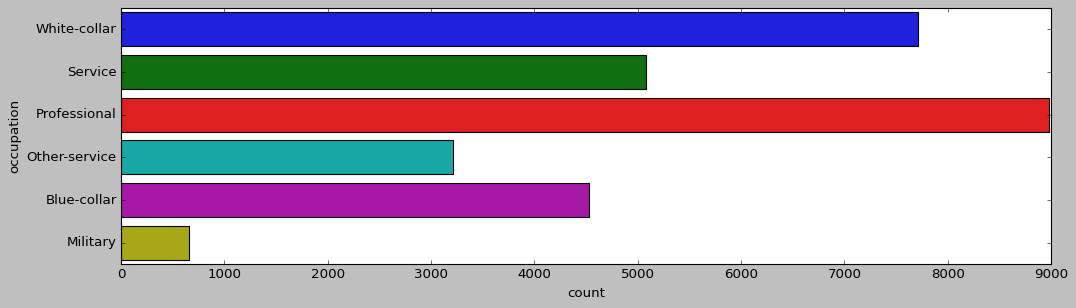

In [4]:
plt.style.use('classic')  
plt.figure(figsize=(15,5))   
sns.countplot(y="occupation", data=df)
plt.show()
 
df.loc[df['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'           #軍方
df.loc[df['occupation'] == 'Protective-serv', 'occupation'] = 'Military'        #軍方
df.loc[df['occupation'] == 'Transport-moving', 'occupation'] = 'Blue-collar'    #藍領
df.loc[df['occupation'] == 'Farming-fishing', 'occupation'] = 'Blue-collar'     #藍領 
df.loc[df['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Blue-collar'   #藍領 
df.loc[df['occupation'] == 'Adm-clerical', 'occupation'] = 'White-collar'       #白領  
df.loc[df['occupation'] == 'Exec-managerial', 'occupation'] = 'White-collar'    #白領  
df.loc[df['occupation'] == 'Sales', 'occupation'] = 'Service'                   #服務業  
df.loc[df['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Service'       #服務業 
df.loc[df['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'         #服務業
df.loc[df['occupation'] == 'Craft-repair', 'occupation'] = 'Professional'       #技術人員
df.loc[df['occupation'] == 'Tech-support', 'occupation'] = 'Professional'       #技術人員 
df.loc[df['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'     #技術人員 

plt.style.use('classic')  
fig = plt.figure(figsize=(15,4))  
sns.countplot(y="occupation", data=df)
plt.show()

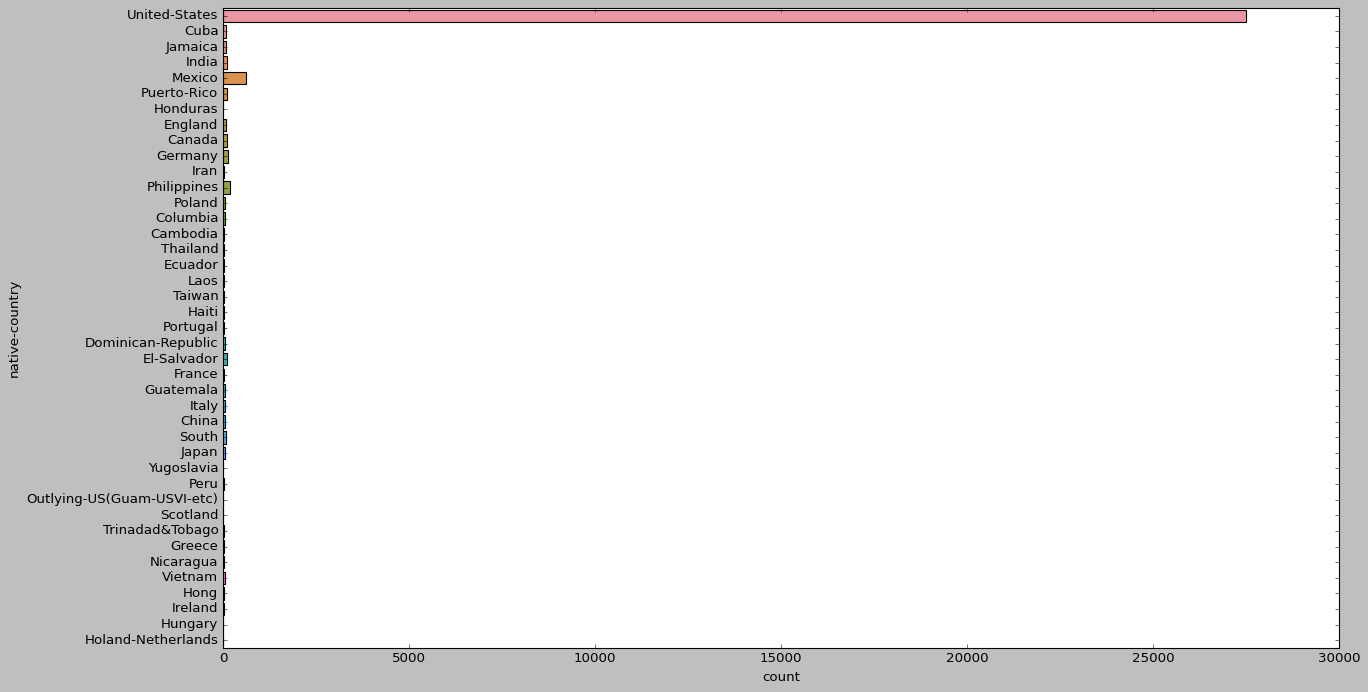

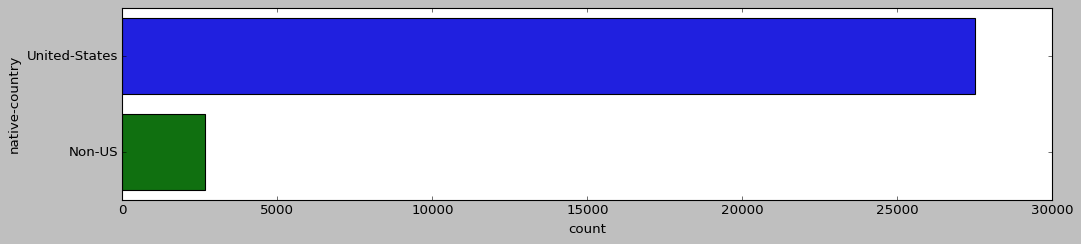

In [5]:
plt.style.use('classic')  
plt.figure(figsize=(18,10))   
sns.countplot(y="native-country", data=df)
plt.show()

df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Non-US'    #非美國

plt.style.use('classic')  
plt.figure(figsize=(15,3))   
sns.countplot(y="native-country", data=df)
plt.show()

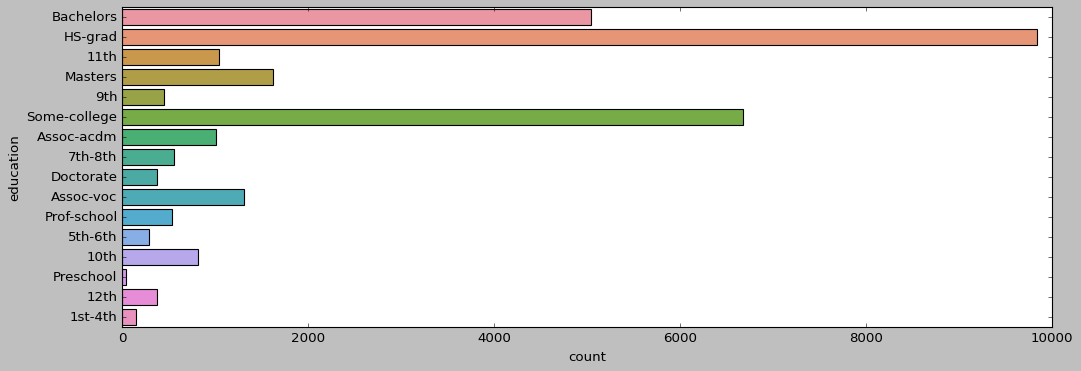

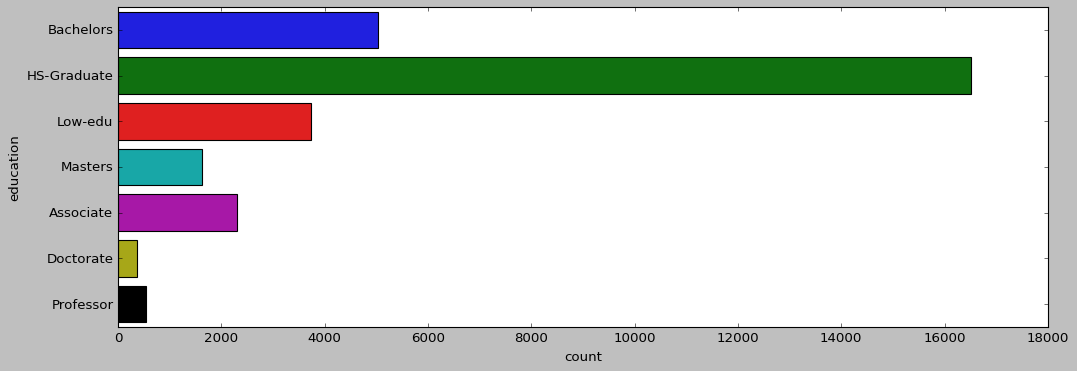

In [6]:
plt.style.use('classic')  
plt.figure(figsize=(15,5))   
sns.countplot(y="education", data=df)
plt.show()

df.loc[df['education'] == 'Preschool', 'education'] = 'Low-edu'         #低學歷  
df.loc[df['education'] == '1st-4th', 'education'] = 'Low-edu'           #低學歷 
df.loc[df['education'] == '5th-6th', 'education'] = 'Low-edu'           #低學歷   
df.loc[df['education'] == '7th-8th', 'education'] = 'Low-edu'           #低學歷   
df.loc[df['education'] == '9th', 'education'] = 'Low-edu'               #低學歷  
df.loc[df['education'] == '10th', 'education'] = 'Low-edu'              #低學歷   
df.loc[df['education'] == '11th', 'education'] = 'Low-edu'              #低學歷   
df.loc[df['education'] == '12th', 'education'] = 'Low-edu'              #低學歷   
df.loc[df['education'] == 'Assoc-acdm', 'education'] = 'Associate'      #專科  
df.loc[df['education'] == 'Assoc-voc', 'education'] = 'Associate'       #專科  
df.loc[df['education'] == 'HS-grad', 'education'] = 'HS-Graduate'       #高中  
df.loc[df['education'] == 'Some-college', 'education'] = 'HS-Graduate'  #高中  
df.loc[df['education'] == 'Prof-school', 'education'] = 'Professor'     #職校

plt.style.use('classic')  
plt.figure(figsize=(15,5))   
sns.countplot(y="education", data=df)
plt.show()

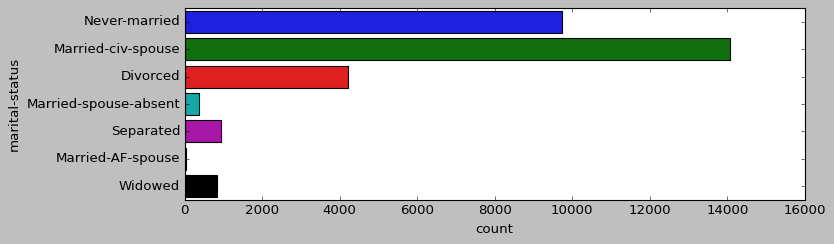

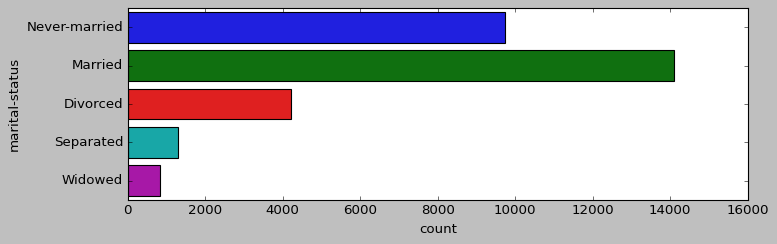

In [7]:
plt.style.use('classic')  
plt.figure(figsize=(10,3))   
sns.countplot(y="marital-status", data=df)
plt.show()
 
df.loc[df['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Separated'  #分居  
df.loc[df['marital-status'] == 'Separated', 'marital-status'] = 'Separated'              #分居  
df.loc[df['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Married'        #已婚  
df.loc[df['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 'Married'       #已婚

plt.style.use('classic')  
plt.figure(figsize=(10,3))   
sns.countplot(y="marital-status", data=df)
plt.show()

In [8]:
educationMapping = {            #ordinal排序
              'Doctorate': 7,
              'Masters': 6,
              'Bachelors': 5,
              'Professor': 4,
              'HS-Graduate': 3,
              'Associate': 2,
              'Low-edu': 1
}
df['education'] = df['education'].map(educationMapping)

In [9]:
#數值轉換
df['workclass'] = df['workclass'].factorize()[0]  
df['education'] = df['education'].factorize()[0]  
df['marital-status'] = df['marital-status'].factorize()[0]  
df['occupation'] = df['occupation'].factorize()[0]   
df['race'] = df['race'].factorize()[0]  
df['sex'] = df['sex'].factorize()[0]  
df['native-country'] = df['native-country'].factorize()[0]  
df['income'] = df['income'].factorize()[0]

In [10]:
#訓練集標準化
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_MinMax = pd.DataFrame(data=scaled_features, columns=['age','workclass','education','marital-status','occupation',
                                                        'race','sex','hours-per-week','native-country','income'])
print(df_MinMax)

            age  workclass  education  marital-status  occupation  race  sex  \
0      0.301370       0.00   0.000000            0.00         0.0  0.00  0.0   
1      0.452055       0.25   0.000000            0.25         0.0  0.00  0.0   
2      0.287671       0.50   0.166667            0.50         0.2  0.00  0.0   
3      0.493151       0.50   0.333333            0.25         0.2  0.25  0.0   
4      0.150685       0.50   0.000000            0.25         0.4  0.25  1.0   
...         ...        ...        ...             ...         ...   ...  ...   
30157  0.136986       0.50   0.666667            0.25         0.4  0.00  1.0   
30158  0.315068       0.50   0.166667            0.25         0.8  0.00  0.0   
30159  0.561644       0.50   0.166667            1.00         0.0  0.00  1.0   
30160  0.068493       0.50   0.166667            0.00         0.0  0.00  0.0   
30161  0.479452       0.25   0.166667            0.25         0.0  0.00  1.0   

       hours-per-week  native-country  

In [11]:
#測試集
test = pd.read_table('adult.test.txt',sep=', ',names=attribute,na_values = '?')
test.reset_index(inplace=True, drop=True)
test.dropna(axis=0, how='any', inplace=True)
test = test.drop(columns=['fnlwgt','education-num','relationship','capital-gain','capital-loss'])

C:\Users\User\AppData\Local\Temp\ipykernel_14912\4058862150.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_table('adult.test.txt',sep=', ',names=attribute,na_values = '?')


In [12]:
test.loc[test['workclass'] == 'Without-pay', 'workclass'] = 'Jobless'       #沒工作
test.loc[test['workclass'] == 'Never-worked', 'workclass'] = 'Jobless'      #沒工作
test.loc[test['workclass'] == 'Federal-gov', 'workclass'] = 'Fed-gov'       #聯邦政府
test.loc[test['workclass'] == 'State-gov', 'workclass'] = 'Non-fed-gov'     #非聯邦政府
test.loc[test['workclass'] == 'Local-gov', 'workclass'] = 'Non-fed-gov'     #非聯邦政府
test.loc[test['workclass'] == 'Self-emp-not-inc', 'workclass'] = 'Self-emp' #自由職業
test.loc[test['workclass'] == 'Self-emp-inc', 'workclass'] = 'Self-emp'     #自由職業

test.loc[test['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'           #軍方
test.loc[test['occupation'] == 'Protective-serv', 'occupation'] = 'Military'        #軍方
test.loc[test['occupation'] == 'Transport-moving', 'occupation'] = 'Blue-collar'    #藍領
test.loc[test['occupation'] == 'Farming-fishing', 'occupation'] = 'Blue-collar'     #藍領 
test.loc[test['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Blue-collar'   #藍領 
test.loc[test['occupation'] == 'Adm-clerical', 'occupation'] = 'White-collar'       #白領  
test.loc[test['occupation'] == 'Exec-managerial', 'occupation'] = 'White-collar'    #白領  
test.loc[test['occupation'] == 'Sales', 'occupation'] = 'Service'                   #服務業  
test.loc[test['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Service'       #服務業 
test.loc[test['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'         #服務業
test.loc[test['occupation'] == 'Craft-repair', 'occupation'] = 'Professional'       #技術人員
test.loc[test['occupation'] == 'Tech-support', 'occupation'] = 'Professional'       #技術人員 
test.loc[test['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'     #技術人員 

test.loc[test['native-country'] != 'United-States', 'native-country'] = 'Non-US'    #非美國

test.loc[test['education'] == 'Preschool', 'education'] = 'Low-edu'         #低學歷  
test.loc[test['education'] == '1st-4th', 'education'] = 'Low-edu'           #低學歷 
test.loc[test['education'] == '5th-6th', 'education'] = 'Low-edu'           #低學歷   
test.loc[test['education'] == '7th-8th', 'education'] = 'Low-edu'           #低學歷   
test.loc[test['education'] == '9th', 'education'] = 'Low-edu'               #低學歷  
test.loc[test['education'] == '10th', 'education'] = 'Low-edu'              #低學歷   
test.loc[test['education'] == '11th', 'education'] = 'Low-edu'              #低學歷   
test.loc[test['education'] == '12th', 'education'] = 'Low-edu'              #低學歷   
test.loc[test['education'] == 'Assoc-acdm', 'education'] = 'Associate'      #專科  
test.loc[test['education'] == 'Assoc-voc', 'education'] = 'Associate'       #專科  
test.loc[test['education'] == 'HS-grad', 'education'] = 'HS-Graduate'       #高中  
test.loc[test['education'] == 'Some-college', 'education'] = 'HS-Graduate'  #高中  
test.loc[test['education'] == 'Prof-school', 'education'] = 'Professor'     #職校

test.loc[test['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Separated'  #分居  
test.loc[test['marital-status'] == 'Separated', 'marital-status'] = 'Separated'              #分居  
test.loc[test['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Married'        #已婚  
test.loc[test['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 'Married'       #已婚

In [13]:
educationMapping = {            #ordinal排序
              'Doctorate': 7,
              'Masters': 6,
              'Bachelors': 5,
              'Professor': 4,
              'HS-Graduate': 3,
              'Associate': 2,
              'Low-edu': 1
}
df['education'] = df['education'].map(educationMapping)

In [14]:
#數值轉換
test['workclass'] = test['workclass'].factorize()[0]  
test['education'] = test['education'].factorize()[0]  
test['marital-status'] = test['marital-status'].factorize()[0]  
test['occupation'] = test['occupation'].factorize()[0]   
test['race'] = test['race'].factorize()[0]  
test['sex'] = test['sex'].factorize()[0]  
test['native-country'] = test['native-country'].factorize()[0]  
test['income'] = test['income'].factorize()[0]

In [15]:
#測試集標準化
scaler.fit(test)
scaled_features = scaler.transform(test)
test_MinMax = pd.DataFrame(data=scaled_features, columns=['age','workclass','education','marital-status','occupation',
                                                          'race','sex','hours-per-week','native-country','income'])
print(test_MinMax)

            age  workclass  education  marital-status  occupation  race  sex  \
0      0.109589       0.00   0.000000            0.00         0.0  0.00  0.0   
1      0.287671       0.00   0.166667            0.25         0.0  0.25  0.0   
2      0.150685       0.25   0.333333            0.25         0.2  0.25  0.0   
3      0.369863       0.00   0.166667            0.25         0.0  0.00  0.0   
4      0.232877       0.00   0.000000            0.00         0.4  0.25  0.0   
...         ...        ...        ...             ...         ...   ...  ...   
15055  0.219178       0.00   0.666667            0.00         0.6  0.25  0.0   
15056  0.301370       0.00   0.666667            1.00         0.6  0.25  1.0   
15057  0.287671       0.00   0.666667            0.25         0.6  0.25  0.0   
15058  0.369863       0.00   0.666667            1.00         0.8  1.00  0.0   
15059  0.246575       0.50   0.666667            0.25         0.8  0.25  0.0   

       hours-per-week  native-country  

In [16]:
#定義訓練集和測試集的(X,y)
y_train = df_MinMax['hours-per-week'].values.reshape(-1, 1)
X_train = df_MinMax.drop('hours-per-week',axis=1).values
y_test = test_MinMax['hours-per-week'].values.reshape(-1, 1)
X_test = test_MinMax.drop('hours-per-week',axis=1).values

In [17]:
features = ['age','workclass','education','marital-status','occupation',
            'race','sex','native-country','income']

In [18]:
#線性迴歸
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

MAE為:0.079
RMSE為:0.117
MAPE為: 625992815449.615


In [19]:
#隨機森林
rf=RandomForestRegressor(n_estimators=150,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
    
print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_14912\1607078492.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


MAE為:0.089
RMSE為:0.126
MAPE為: 553816669259.833


In [20]:
#XGBRegressor
xgb=XGB.XGBRegressor(n_estimators=100, learning_rate=0.3)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
fit = xgb.fit(X_test,y_test)
print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

MAE為:0.089
RMSE為:0.127
MAPE為: 480360244312.169


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


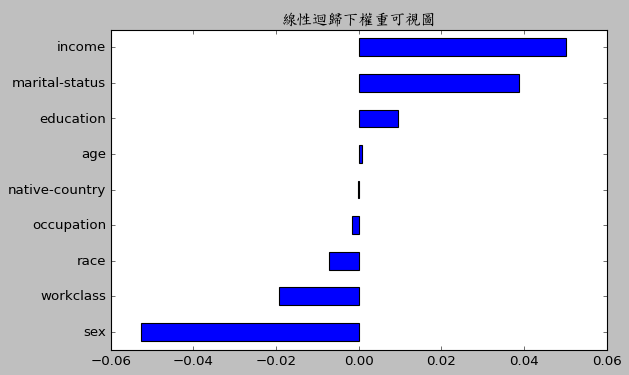

In [21]:
#線性迴歸權重可視化
reg=LassoCV()
reg.fit(X_train,y_train)
coef=pd.Series(reg.coef_,index=features)

chinese = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')
imp_coef = pd.concat([coef.sort_values().head(5), coef.sort_values().tail(4)])
plt.rcParams['figure.figsize'] = (8,5)
imp_coef.plot(kind = "barh")
plt.title("線性迴歸下權重可視圖", fontproperties=chinese, size=14)
plt.show()

In [22]:
del_lr_df_MinMax = df_MinMax.drop(columns=['race','sex','native-country','workclass','occupation'])
del_lr_test_MinMax = df_MinMax.drop(columns=['race','sex','native-country','workclass','occupation'])

In [23]:
#篩選特徵屬性後的訓練集和測試集(X,y)
y_train = del_lr_df_MinMax['hours-per-week'].values.reshape(-1, 1)
X_train = del_lr_df_MinMax.drop('hours-per-week',axis=1).values
y_test = del_lr_test_MinMax['hours-per-week'].values.reshape(-1, 1)
X_test = del_lr_test_MinMax.drop('hours-per-week',axis=1).values

In [24]:
#刪掉屬性後的線性迴歸
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

MAE為:0.076
RMSE為:0.119
MAPE為: 423354833355.006


<AxesSubplot:>

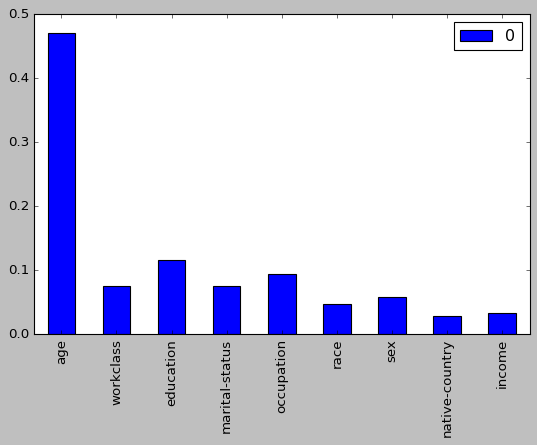

In [25]:
#隨機森林屬性重要度
feature_importance = pd.DataFrame(rf.feature_importances_,index = features)
feature_importance.plot(kind='bar')

In [26]:
del_rf_df_MinMax = df_MinMax.drop(columns=['race','native-country','income'])
del_rf_test_MinMax = df_MinMax.drop(columns=['race','native-country','income'])

In [27]:
#篩選特徵屬性後的訓練集和測試集(X,y)
y_train = del_rf_df_MinMax['hours-per-week'].values.reshape(-1, 1)
X_train = del_rf_df_MinMax.drop('hours-per-week',axis=1).values
y_test = del_rf_test_MinMax['hours-per-week'].values.reshape(-1, 1)
X_test = del_rf_test_MinMax.drop('hours-per-week',axis=1).values

In [28]:
#刪掉屬性後的隨機森林
rf=RandomForestRegressor(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_14912\1852031193.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


MAE為:0.060
RMSE為:0.087
MAPE為: 298372664301.463


<AxesSubplot:>

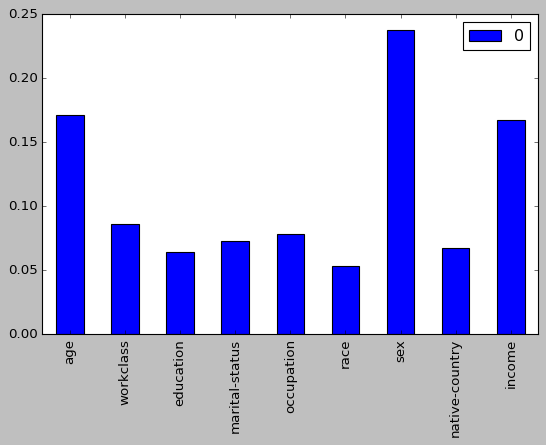

In [29]:
#XGB屬性重要度
feature_importance = pd.DataFrame(fit.feature_importances_,index = features)
feature_importance.plot(kind='bar')

In [30]:
del_xgb_df_MinMax = df_MinMax.drop(columns=['race','native-country','education'])
del_xgb_test_MinMax = df_MinMax.drop(columns=['race','native-country','education'])

In [31]:
#篩選特徵屬性後的訓練集和測試集(X,y)
y_train = del_xgb_df_MinMax['hours-per-week'].values.reshape(-1, 1)
X_train = del_xgb_df_MinMax.drop('hours-per-week',axis=1).values
y_test = del_xgb_test_MinMax['hours-per-week'].values.reshape(-1, 1)
X_test = del_xgb_test_MinMax.drop('hours-per-week',axis=1).values

In [32]:
#刪掉屬性後的XGBRegressor
xgb=XGB.XGBRegressor(n_estimators=100, learning_rate=0.3)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
fit = xgb.fit(X_test,y_test)
print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))

MAE為:0.068
RMSE為:0.100
MAPE為: 314918555160.189
